<a href="https://colab.research.google.com/github/mofanchang/AHEAD-interview-question/blob/main/Bonus_Question.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###1.Please explain the fundamental principles of flow cytometry and walk through the step-by-step process of how it works? Additionally, highlight some common applications of flow cytometry in scientific research and clinical settings.

**1.1**

**Flow cytometry principle**
Utilizing FSC and SSC, the cells with the target fluorescent substance are detected. The photomultiplier tube (PMT) is employed to collect signals at specific wavelengths. These signals are then converted into digital form by dedicated detectors.

**1.2**

**Step 1: Sample Preparation**

1. Collect cells or tissue, create a single-cell suspension.
2. Transfer the suspension to a 96-well plate, test tubes, or round bottom tubes based on cell count and volume.
3. Wash cells, ensure cell count and viability.
4. Centrifuge and resuspend cells in cold suspension buffer for a concentration of 0.5–1 x 106 cells/mL.

**Step 2: Live/Dead Staining**

1. Use a viability dye to differentiate live and dead cells.
2. Wash stained cells, prevent photobleaching.

**Step 3: Fixation and Permeabilization (For Intracellular Staining)**

1. Fix cells using appropriate fixative.
2. Wash fixed cells, then perform permeabilization.
3. Permeabilized cells are ready for staining.

**Step 4: Blocking**

1. Use blocking agents to prevent non-specific antibody binding.
2. Wash cells, prepare for antibody incubation.

**Step 5: Antibody Incubation**

1. Stain cells with labeled primary or secondary antibodies.
2. Wash stained cells, prepare for flow cytometer analysis.

**Step 6: Detection and Data Analysis**

1. Analyze stained cells in the flow cytometer.
2. Follow manufacturer's guide for detection and data analysis.

These simplified steps outline the main process of flow cytometry from sample preparation to antibody incubation to data analysis. The fluidics system maintains a constant flow of single-cell suspension through the cytometer. Laser illumination interacts with cells, causing scatter and fluorescence emissions.

Scatter Detection:
- FSC (Forward Scatter): Measures light intensity scattered in the forward direction, indicating size.
- SSC (Side Scatter): Measures light scattered at an angle, indicating complexity or granularity.

Fluorescence Detection:
- Fluorescently labeled cells emit specific wavelengths when illuminated by lasers. Detectors capture emitted fluorescence, enabling analysis of specific molecules within cells.

Data Analysis:
- Signals from detectors are collected and analyzed. Data is presented as scatter plots and histograms, allowing researchers to differentiate cell populations based on size, complexity, and fluorescence.

**1.3**
Applications of flow cytometry in scientific research and clinical settings

**Scientiftic research**

1.Immunophenotyping

2.Cell Sorting

3.Cell Cycle Analysis

4.Apoptosis

5.Cell Proliferation Assays

6.Intracellular Calcium Flux

**Clinical setting**

1.Analysis of leukaemias and lymphomas

2.Detection of minimal residual disease

3.Stem cell enumeration

4.solid organ transplantation

5.Postoperative monitoring

6.Detection of autoantibodies

7.HIV infection.

8.Foeto-maternal haemorrhage

9.Immunodeficiency diseases

10.Paroxysmal nocturnal haemoglobinuria

11.Reticulocyte analysis

12.Some other applications in blood transfusion



###2.Below are plots of selected cell surface biomarkers of blood cell samples. Researchers are interested in picking out cells marked in yellow (accupying a high-density chunk at the bottom-right) for further analysis. How would you suggest a method to automatically identify these cells?

1. Clustering Algorithm:

Using clustering algorithms such as K-means clustering, hierarchical clustering, or DBSCAN,

cells can be grouped based on their expression profiles of biomarkers.

2. Thresholding Algorithm:

By setting thresholds based on the desired target antibody,

you can define thresholds based on the range of biomarker expression values of cells.

Only cells with biomarker expression values above the threshold are labeled as target cells (in yellow).

In [ ]:
pip install FlowCal

In [2]:
import os
import FlowCal
import pandas as pd
from io import StringIO
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

def concat_FCSdata_FeatureName(filename):
    # Load the FCS file
    fcs_file = FlowCal.io.FCSData(filename)

    # View and store feature
    tuple_feature = fcs_file.channels
    list_feature = list(tuple_feature)

    # Convert the FCS data to DataFrame
    df = pd.DataFrame(fcs_file)
    df.columns = list_feature

    return df

# Read label information from Excel file
EU_label = pd.read_excel('/content/drive/MyDrive/EU_label.xlsx')
label = EU_label['label']
label_map = {
    'Sick': 1,
    'Healthy': 0,
}

# Specify the main directory containing subdirectories with FCS files
main_directory = "/content/drive/MyDrive/raw_fcs"

# Initialize an empty DataFrame to store concatenated data
final_df = pd.DataFrame()

# Initialize lists to store processed and unprocessed file paths
processed_files = []
unprocessed_files = []

# Recursively traverse through the main directory
for root, dirs, files in os.walk(main_directory):
    for file in files:
        if file.endswith(".fcs"):
            file_path = os.path.join(root, file)
            processed_files.append(file_path)  # Add to processed files list

            # Extract Patient ID from the filename
            Patient = os.path.basename(os.path.dirname(file_path))
            PatientID = StringIO(Patient)
            df_PatientID = pd.read_csv(PatientID)

            # Concatenate feature names and FCS data
            df = concat_FCSdata_FeatureName(file_path)

            # Find matching label for the current patient
            for index, row in EU_label.iterrows():
                if row['file_flow_id'] == Patient:
                    label_value = row['label']
                    label_int = label_map[label_value]
                    df['Patient_ID'] = Patient
                    df['COVID19'] = label_value
                    df['Label'] = label_int

                    # Concatenate the current patient data to the final DataFrame
                    final_df = pd.concat([final_df, df], ignore_index=True)

# Find unprocessed files by subtracting processed files from all files
all_files = []
for root, dirs, files in os.walk(main_directory):
    for file in files:
        if file.endswith(".fcs"):
            file_path = os.path.join(root, file)
            all_files.append(file_path)

unprocessed_files = list(set(all_files) - set(processed_files))

# Print unprocessed file paths
print("Unprocessed files:")
for file_path in unprocessed_files:
    print(file_path)

# Display the final DataFrame
print('Final DataFrame')
display(final_df)


Unprocessed files:
Final DataFrame


,FSC-A,FSC-H,FSC-W,SSC-A,SSC-H,SSC-W,FJComp-APC-A,FJComp-APC-H7-A,FJComp-APC-R700-A,FJComp-BB630-A,...,FJComp-BYG584-A,FJComp-BYG670-A,FJComp-BYG790-A,FJComp-FITC-A,FJComp-PE-CF594-A,FJComp-PE-Cy5.5-A,Time,Patient_ID,COVID19,Label
0,85016.500000,72034.179688,141938.000000,36644.562500,34746.667969,108497.812500,112.060295,73.952873,575.514587,50.510109,...,367.581573,204.302658,31.506687,-10.046371,96.860161,-10.614620,2.082766,flowrepo_covid_EU_038_flow_001,Sick,1
1,99848.312500,82380.554688,148984.828125,36342.511719,34517.816406,110496.539062,12.135560,-2.252536,1103.213257,-9.319699,...,389.542206,53.993160,36.968693,8196.370117,145.267517,-2.372972,2.098672,flowrepo_covid_EU_038_flow_001,Sick,1
2,87271.375000,70381.554688,149391.328125,102471.359375,95452.343750,124364.382812,-175.771729,34.822311,1798.449951,10.881639,...,622.587097,7.714994,72.636543,108.994469,597.781006,-97.149773,2.110145,flowrepo_covid_EU_038_flow_001,Sick,1
3,99559.828125,81619.625000,152953.578125,33188.042969,30318.783203,110333.085938,-12.676451,-62.132755,711.477234,13.103123,...,112.845123,249.754883,27.184982,299.286194,-0.004420,14.104618,2.126928,flowrepo_covid_EU_038_flow_001,Sick,1
4,91380.500000,74045.578125,152607.359375,43466.996094,42688.882812,110727.539062,25.795591,-65.608521,868.179382,20.005610,...,93.305313,58.850441,257.658386,159.822357,23.634172,-7.000971,2.135461,flowrepo_covid_EU_038_flow_001,Sick,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5052715,112839.765625,98341.132812,142445.859375,29081.863281,27505.736328,105076.835938,6.316328,51.644669,942.212097,32.781143,...,445.735321,20.294441,-12.380395,77.997650,230.865921,147.672729,18717.740234,flowrepo_covid_EU_009_flow_001,Healthy,0
5052716,89548.960938,74433.585938,142836.250000,28729.320312,26998.513672,107352.179688,-47.678730,13.358541,964.234131,74.517166,...,363.565735,42.650570,29.225389,41.909229,-48.261032,96.216087,18718.947266,flowrepo_covid_EU_009_flow_001,Healthy,0
5052717,85100.273438,69878.351562,149342.781250,32437.927734,31116.955078,105052.789062,18.279118,42.405369,701.323181,98.870407,...,217.989502,120.296196,215.177963,206.483566,103.814499,162.783371,18719.769531,flowrepo_covid_EU_009_flow_001,Healthy,0
5052718,87624.460938,72880.015625,145184.968750,48090.003906,46063.785156,111395.398438,78.057076,17.310251,1029.988525,92.421181,...,375.092560,177.576324,407.668121,370.730530,77.303802,-7.522663,18720.822266,flowrepo_covid_EU_009_flow_001,Healthy,0


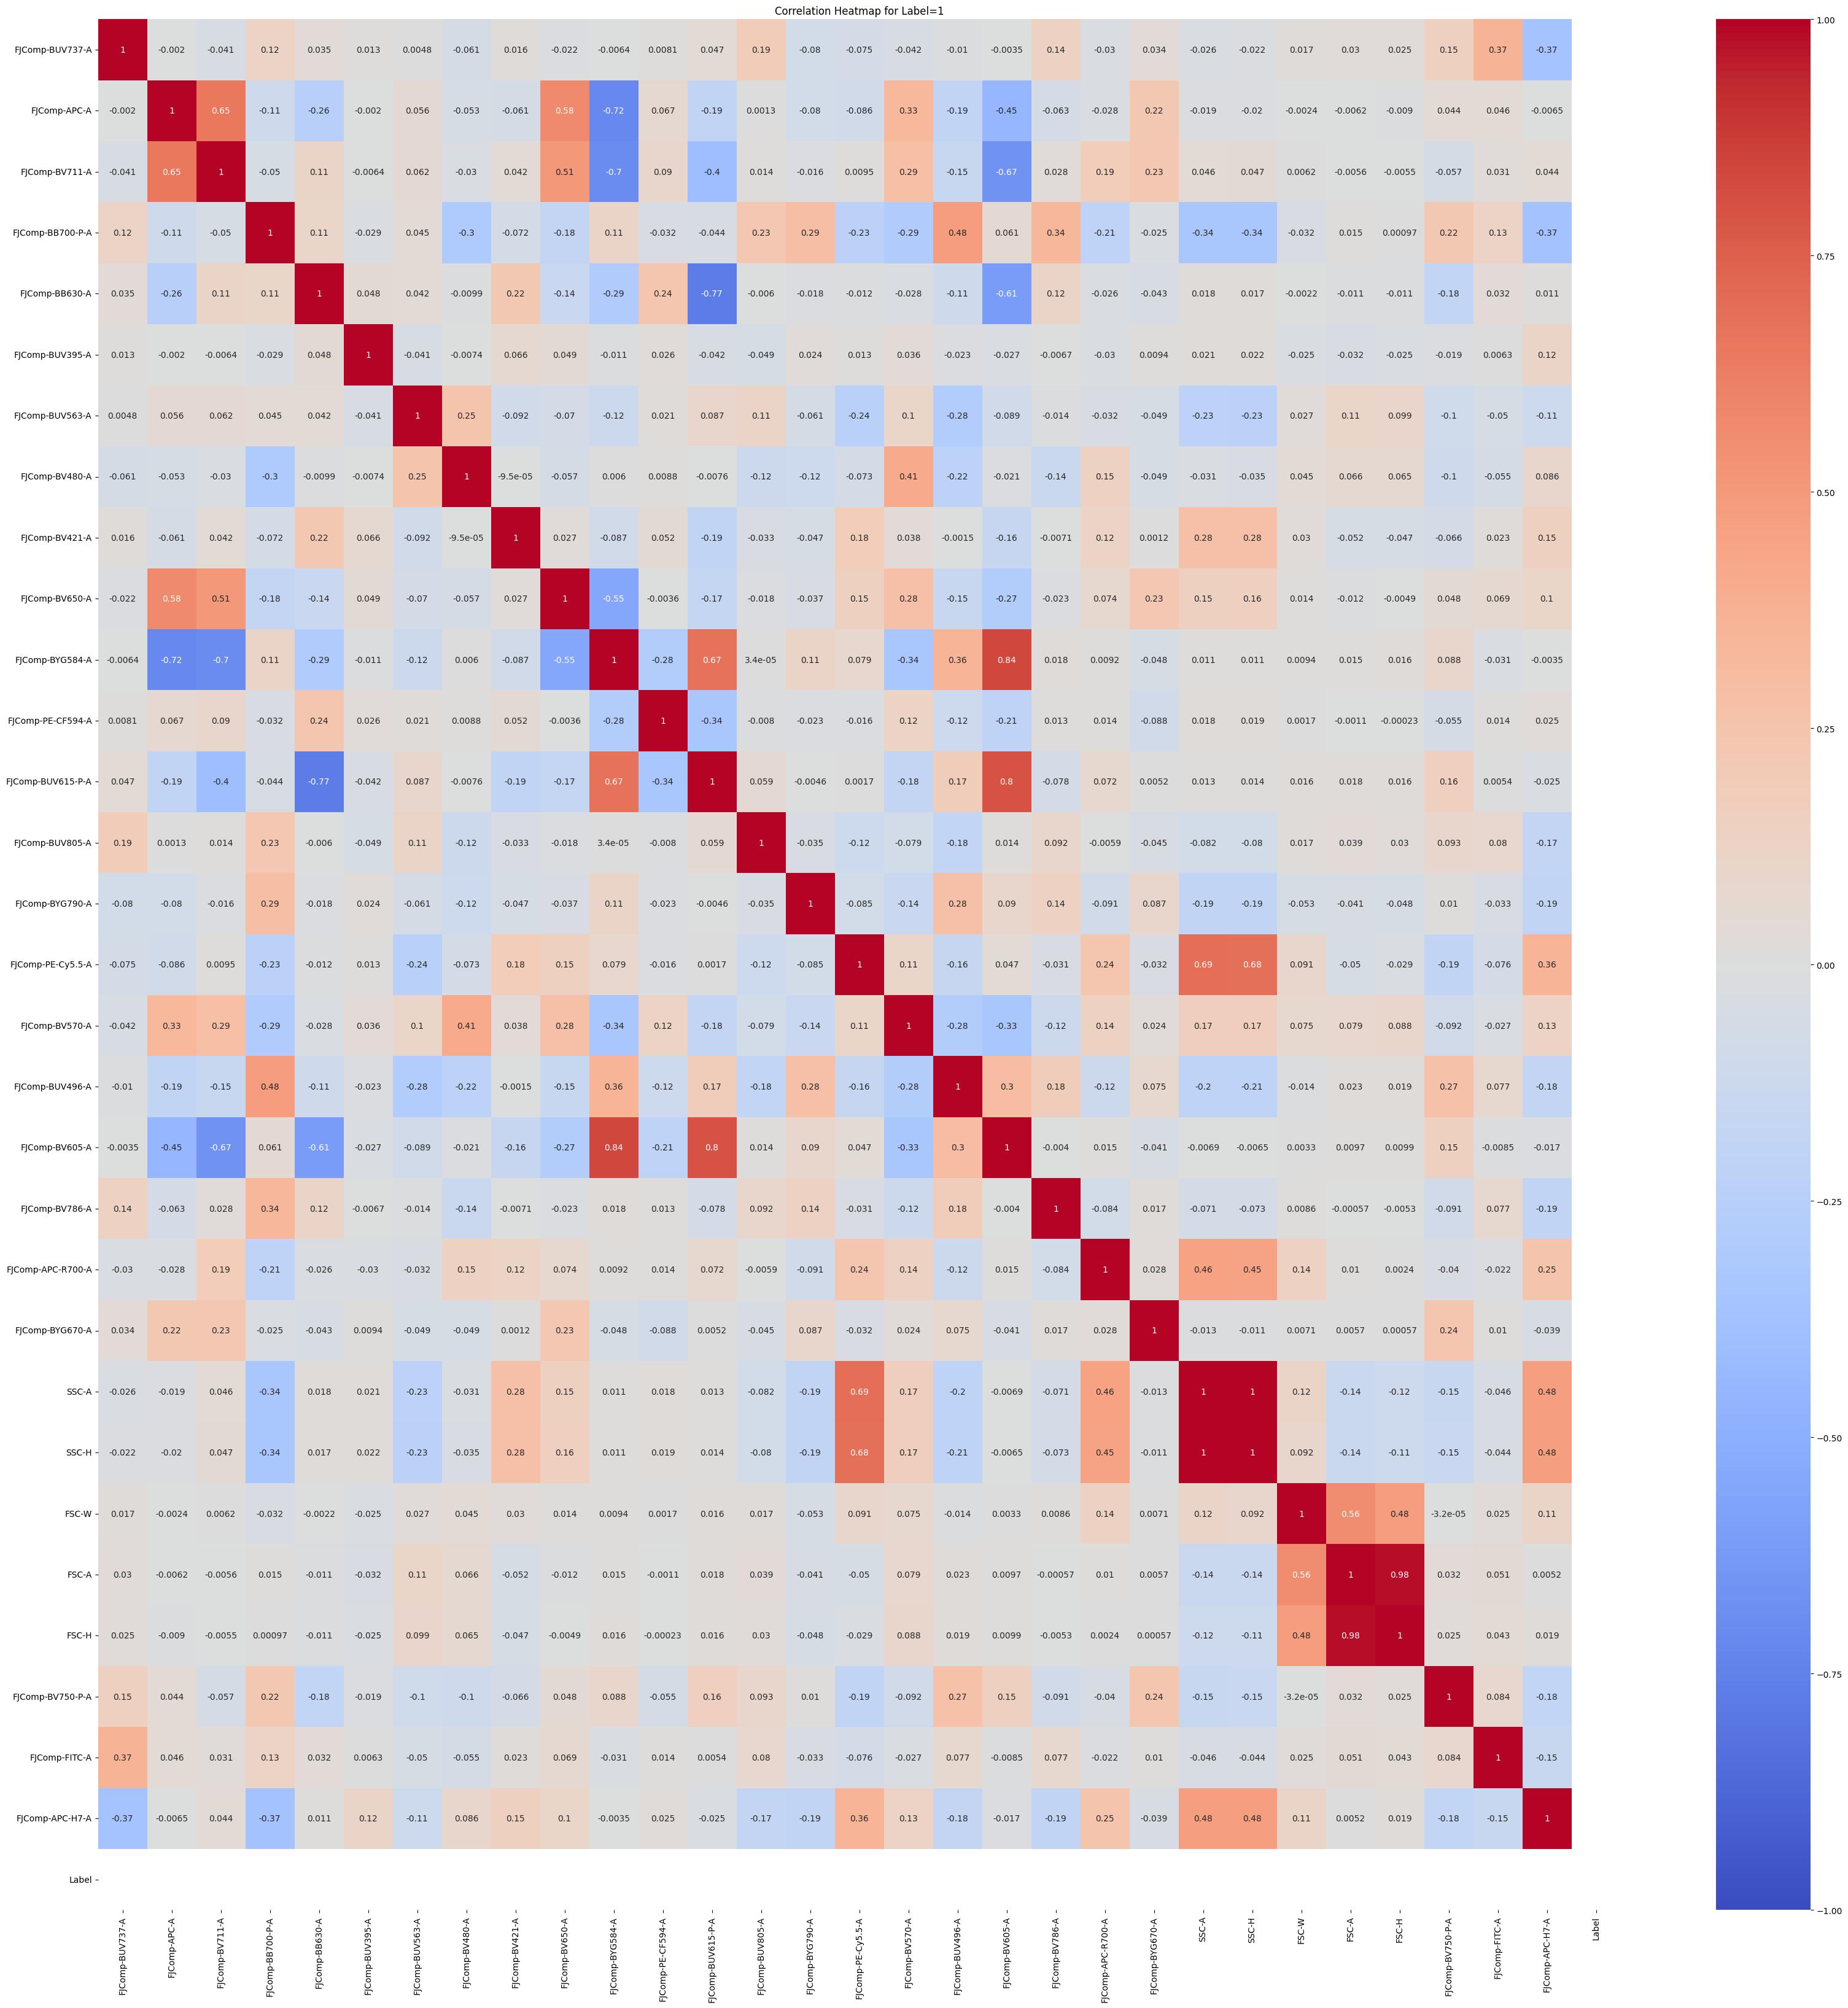

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load DataFrame
# final_df = pd.read_csv("your_data.csv")

# Selected features
selected_features = ['FJComp-BUV737-A','FJComp-APC-A','FJComp-BV711-A','FJComp-BB700-P-A','FJComp-BB630-A','FJComp-BUV395-A','FJComp-BUV563-A','FJComp-BV480-A',
'FJComp-BV421-A','FJComp-BV650-A','FJComp-BYG584-A','FJComp-PE-CF594-A','FJComp-BUV615-P-A','FJComp-BUV805-A','FJComp-BYG790-A',
'FJComp-PE-Cy5.5-A','FJComp-BV570-A','FJComp-BUV496-A','FJComp-BV605-A','FJComp-BV786-A','FJComp-APC-R700-A','FJComp-BYG670-A',
'SSC-A','SSC-H','FSC-W','FSC-A','FSC-H','FJComp-BV750-P-A','FJComp-FITC-A','FJComp-APC-H7-A','Label']

# Select rows of data where the value in the "Label" column is 1.
positive_samples = final_df[final_df['Label'] == 1]

# # Plot a heatmap of the correlation matrix
correlation_matrix = positive_samples[selected_features].corr()

# Call the correlation heatmap function
plt.figure(figsize=(40, 40))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap for Label=1')
plt.show()



1.   Based on the cross matrix,
2.   Choose a threshold.
3.   Target entities with high correlation.
4.   Perform clustering.

In [4]:
import FlowCal
import numpy as np

# Load the FCS file using FlowCal
fcs_filename = '/content/drive/MyDrive/raw_fcs/flowrepo_covid_EU_048_flow_001/export_COVID19 samples 23_04_20_ST3_COVID19_W_046_O ST3 230420_011_Live_cells.fcs'
fcs_data = FlowCal.io.FCSData(fcs_filename)

# Extract the numerical data from FCSData object
data = np.array(fcs_data)

In [5]:
# Calcuate cross matrix
def compute_correlation_matrix(data):
    correlation_matrix = np.corrcoef(data, rowvar=False)
    return correlation_matrix

correlation_matrix = compute_correlation_matrix(data)


In [6]:
# Choise threshold
threshold = 0.7

# Select feacture indices
def select_features_indices(correlation_matrix, threshold):
    selected_features_indices = np.where((correlation_matrix > threshold).sum(axis=0) > 1)[0]
    return selected_features_indices

selected_features_indices = select_features_indices(correlation_matrix, threshold)
print("Selected Features Indices:", selected_features_indices)


Selected Features Indices: [ 0  1  2  3  4  5 20 33]


In [7]:
from sklearn.cluster import DBSCAN
# perform_clustering
def perform_clustering(data, selected_features_indices, eps, min_samples):
    features = data[:, selected_features_indices]

    # Initialize DBSCAN model (tune parameters as needed)
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)

    # Perform clustering
    labels = dbscan.fit_predict(features)
    return labels

# Set DBSCAN parameters
eps = 0.1
min_samples = 1000

# Perform clustering
labels = perform_clustering(data, selected_features_indices, eps, min_samples)
